In [4]:
#https://www.tensorflow.org/tutorials/quickstart/advanced 

import tensorflow as tf

print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

import tensorflow.keras as keras

from tabulate import tabulate
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#import tensorflow.keras.backend as K

TensorFlow version: 2.10.0


In [5]:
#implied volatility
def d1(sigma, t, T, S, K, r):
    frac = 1 / (sigma * np.sqrt(T - t))
    secondfactor = np.log(S / K) + (r + ((sigma ** 2) / 2)) * (T - t)
    return frac * secondfactor

def d2(sigma, t, T, S, K, r):
    return d1(sigma, t, T, S, K, r) - (sigma * np.sqrt(T - t))

def put_price(sigma, t, T, S, K, r):
    return (norm.cdf(-d2(sigma, t, T, S, K, r)) * K * np.exp(-r * (T - t))) - (norm.cdf(-d1(sigma, t, T, S, K, r)) * S)

def call_price(sigma, t, T, S, K, r):
    return S*norm.cdf(d1(sigma, t, T, S, K,r)) - K*np.exp(-r*(T - t)*norm.cdf(d2(sigma, t, T, S, K, r)))
def implied_vol(price, t, T, S, K, r):
    sigma1 = 0.1
    sigma2 = 0.7
    value1 = put_price(sigma1, t, T, S, K, r) - price
    value2 = put_price(sigma2, t, T, S, K, r) - price
    
    while value1 * value2 > 0:
        sigma1 = sigma1 - 0.01
        sigma2 = sigma2 + 0.01
        value1 = put_price(sigma1, t, T, S, K, r) - price
        value2 = put_price(sigma2, t, T, S, K, r) - price
    i = 0
    while True:
        i = i + 1
        if value1 * value2 == 0:
            if value1 == 0:
                imp_vol = sigma1 #print('implied volatility=', sigma1)
            elif value2 == 0:
                imp_vol = sigma2 #print('implied volatility=', sigma2)
            break
        elif value1 * value2 < 0:
            midpoint = (sigma1 + sigma2) / 2
            if (put_price(midpoint, t, T, S, K, r) - price) * value1 < 0:
                sigma1 = sigma1
                sigma2 = midpoint
                value1 = put_price(sigma1, t, T, S, K, r) - price
                value2 = put_price(sigma2, t, T, S, K, r) - price

            elif (put_price(midpoint, t, T, S, K, r) - price) * value2 < 0:
                sigma1 = midpoint
                sigma2 = sigma2
                value1 = put_price(sigma1, t, T, S, K, r) - price
                value2 = put_price(sigma2, t, T, S, K, r) - price

        if abs(sigma1 - sigma2) < 0.000001:
            imp_vol = sigma2
            break
    return imp_vol




strikes = [85,90,95,100,105,110,115]

------------------European option prices and IV-----------------------



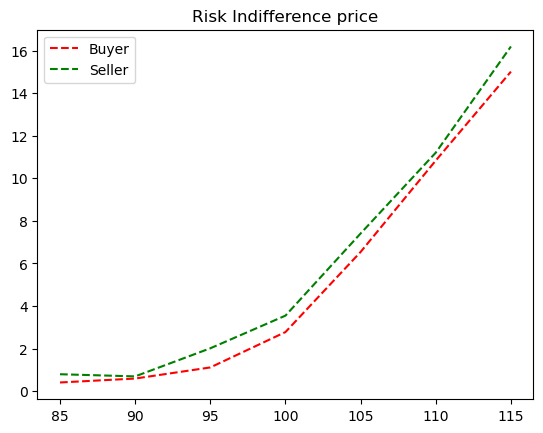

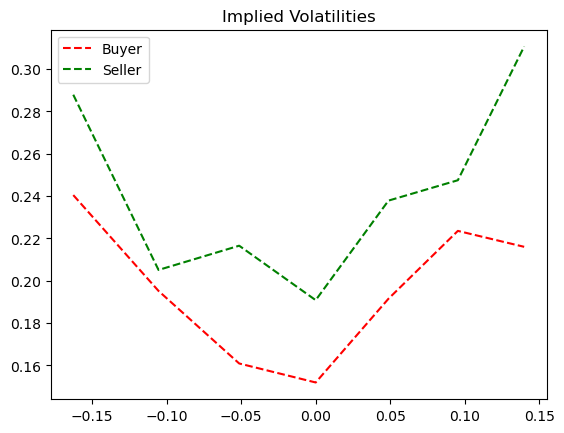

------------------American option prices and IV---------------------



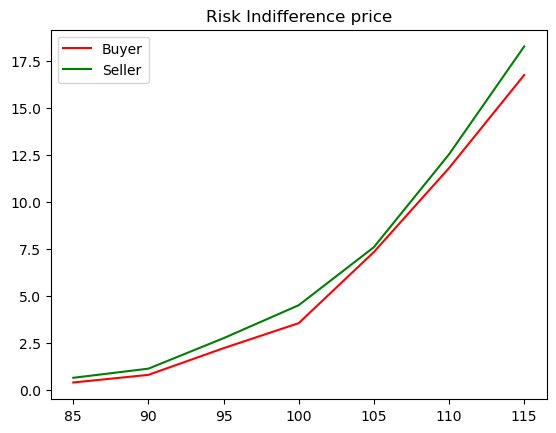

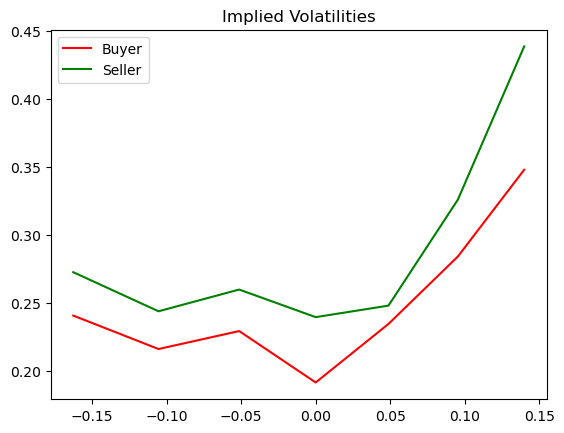

-----------Seller and Buyer prices----------------
Strike = 85 Seller Price =  0.66326475 Buyer Price =  0.41409937
Strike = 90 Seller Price =  1.1494763 Buyer Price =  0.8197342
Strike = 95 Seller Price =  2.7694418 Buyer Price =  2.2381377
Strike = 100 Seller Price =  4.522848 Buyer Price =  3.5695698
Strike = 105 Seller Price =  7.6087294 Buyer Price =  7.3520346
Strike = 110 Seller Price =  12.546032 Buyer Price =  11.816326
Strike = 115 Seller Price =  18.280828 Buyer Price =  16.762764

--------------------------------------------------------


-----------------Comparison---------------------------

  Log_Moneyness    Amer Sell    Amer Buy    Euro Sell    Euro Buy
---------------  -----------  ----------  -----------  ----------
             85     0.663265    0.414099     0.798419    0.411129
             90     1.14948     0.819734     0.697484    0.595756
             95     2.76944     2.23814      2.01711     1.1179
            100     4.52285     3.56957      3.5516      2.

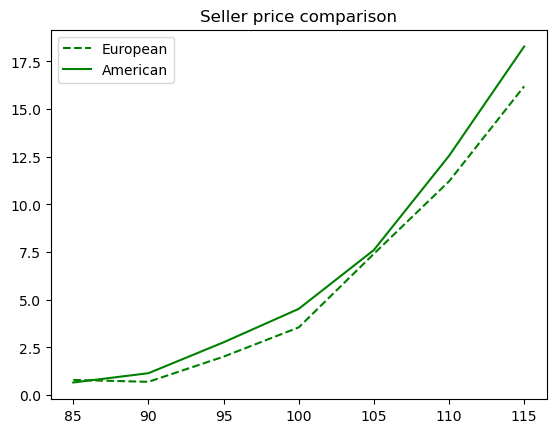

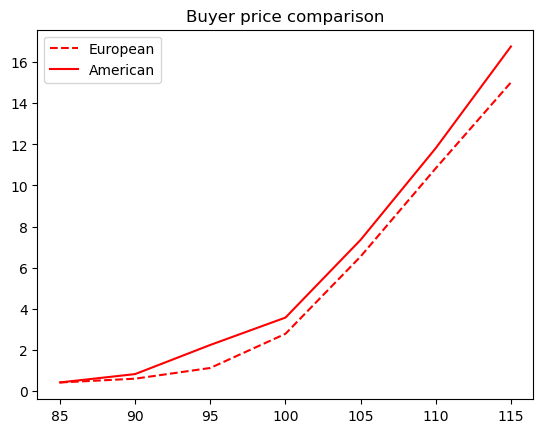

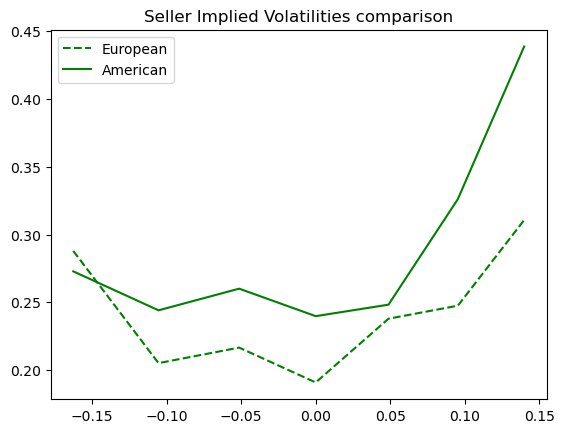

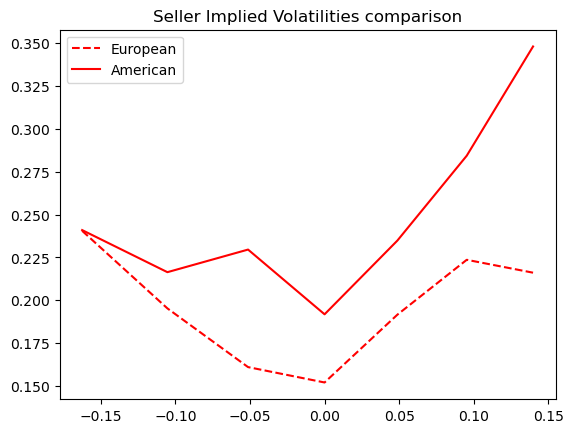

In [7]:
strikes = [85, 90, 95, 100, 105, 110, 115]
T = 1/4
r = 0.02
Euro_Buyer_price = np.loadtxt("Euro_Buyer_prices.csv", delimiter = ",") 
Euro_Seller_price = np.loadtxt("Euro_Seller_prices.csv", delimiter = ",") 

Euro_Buyer_price = np.array(Euro_Buyer_price)
Euro_Seller_price = np.array(Euro_Seller_price)

Euro_Seller_IV = []
Euro_Buyer_IV = []
Strike_array = np.array(strikes)
for i in range(7):
    IV = implied_vol(Euro_Seller_price[i], 0, T, 100, Strike_array[i], r)
    Euro_Seller_IV.append(IV)
    IV_buy = implied_vol(Euro_Buyer_price[i], 0, T, 100, Strike_array[i], r)
    Euro_Buyer_IV.append(IV_buy)
    #print('Strike =', Strike_array[i], 'Seller Price = ', Seller_price[i])
    


Euro_Buyer_IV = np.array(Euro_Buyer_IV)
Euro_Seller_IV = np.array(Euro_Seller_IV)

log_Money = np.log(Strike_array/100)

print('------------------European option prices and IV-----------------------')
print('')


plt.plot(Strike_array, Euro_Buyer_price, '--',  color='red',label='Buyer')
plt.plot(Strike_array, Euro_Seller_price, '--',  color='green',label='Seller')

plt.title("Risk Indifference price")
plt.legend()
plt.show()

#plot Implied volailities
plt.plot(log_Money, Euro_Buyer_IV, '--', color='red',label='Buyer')
plt.plot(log_Money, Euro_Seller_IV, '--', color='green',label='Seller')

plt.title("Implied Volatilities")
plt.legend()
plt.show()


print('------------------American option prices and IV---------------------')
print('')
Amer_Seller_price = np.loadtxt("Amer_Seller_prices.csv", delimiter = ",", dtype = 'float32') 
Amer_Buyer_price = np.loadtxt("Amer_Buyer_prices.csv", delimiter = ",", dtype = 'float32') 
#Seller_price = Seller_price.reshape((10, 1))
Amer_Seller_price = np.array(Amer_Seller_price)
Amer_Buyer_price = np.array(Amer_Buyer_price)

Amer_Seller_IV = []
Amer_Buyer_IV = []
for i in range(7):
    IV = implied_vol(Amer_Seller_price[i], 0, T, 100, Strike_array[i], r)
    Amer_Seller_IV.append(IV)
    IV_buy = implied_vol(Amer_Buyer_price[i], 0, T, 100, Strike_array[i], r)
    Amer_Buyer_IV.append(IV_buy)

plt.plot(Strike_array, Amer_Buyer_price,  color='red',label='Buyer')
plt.plot(Strike_array, Amer_Seller_price, color='green',label='Seller')

plt.title("Risk Indifference price")
plt.legend()
plt.show()

#plot Implied volailities
plt.plot(log_Money, Amer_Buyer_IV, color='red',label='Buyer')
plt.plot(log_Money, Amer_Seller_IV,  color='green',label='Seller')

plt.title("Implied Volatilities")
plt.legend()
plt.show()

print('-----------Seller and Buyer prices----------------')

Amer_Seller_IV = []
Amer_Buyer_IV = []
for i in range(7):
    Am_S_IV = implied_vol(Amer_Seller_price[i], 0, T, 100, Strike_array[i], r)
    Amer_Seller_IV.append(Am_S_IV)
    Am_B_IV = implied_vol(Amer_Buyer_price[i], 0, T, 100, Strike_array[i], r)
    Amer_Buyer_IV.append(Am_B_IV)
    print('Strike =', Strike_array[i], 'Seller Price = ', Amer_Seller_price[i], 'Buyer Price = ', Amer_Buyer_price[i])

log_Money = np.log(Strike_array/100)    
print('')
print('--------------------------------------------------------')
print('')


print('')
print('-----------------Comparison---------------------------')
print('')

 
Price_table = np.stack((Strike_array, Amer_Seller_price, Amer_Buyer_price, Euro_Seller_price, Euro_Buyer_price), axis=-1)
print (tabulate(Price_table, headers=['Log_Moneyness', 'Amer Sell', 'Amer Buy', 'Euro Sell', 'Euro Buy']))

print('')

Amer_Seller_IV = np.array(Amer_Seller_IV)
Amer_Buyer_IV = np.array(Amer_Buyer_IV)
#print('Log Moneyness = ',log_Money)
#print('Seller Implied Volatilities = ', Seller_IV)
#print('Buyer Implied Volatilities = ',Buyer_IV)

#plot prices

plt.plot(Strike_array, Euro_Seller_price, '--',  color='green',label='European')
plt.plot(Strike_array, Amer_Seller_price, color='green',label='American')

plt.title("Seller price comparison")
plt.legend()
plt.show()

plt.plot(Strike_array, Euro_Buyer_price, '--',  color='red',label='European')
plt.plot(Strike_array, Amer_Buyer_price, color='red',label='American')
plt.title("Buyer price comparison")
plt.legend()
plt.show()

#plot Implied volailities

plt.plot(log_Money, Euro_Seller_IV, '--', color='green',label='European')
plt.plot(log_Money, Amer_Seller_IV, color='green',label='American')

plt.title("Seller Implied Volatilities comparison")
plt.legend()
plt.show()
     
plt.plot(log_Money, Euro_Buyer_IV, '--', color='red',label='European')
plt.plot(log_Money, Amer_Buyer_IV, color='red',label='American')
plt.title("Seller Implied Volatilities comparison")
plt.legend()
plt.show()